# Análise HCNSW nmslib

## Imports

In [1]:
from numpy import load
from math import sqrt
from tabulate import tabulate
import matplotlib.pyplot as plt

## Constantes e funções

In [2]:
DB_NAME = "sift1m"
METHOD_NAMES = ("hnsw", "hcnsw")

In [3]:
def get_mean_and_sd(values):
    mean = sum(values)/len(values)
    s2 = (sum((x-mean)**2 for x in values))/(len(values)-1)
    s = sqrt(s2)
    return mean, s

## Teste base (seed=0)

In [14]:
recalls = {}
deltas = {}
for method_name in METHOD_NAMES:
    recalls[method_name] = load(f"data/{method_name}_{DB_NAME}_recalls.npy")
    deltas[method_name] = load(f"data/{method_name}_{DB_NAME}_deltas.npy")

In [5]:
table = []
for method_name in METHOD_NAMES:
    mean_recalls, s_recalls = get_mean_and_sd(recalls[method_name])
    mean_deltas, s_deltas = get_mean_and_sd(deltas[method_name])
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [6]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100         SD    query time (s)        SD
--------  ------------  ---------  ----------------  --------
hnsw          0.925456  0.0686424        0.00181133  0.167318
hcnsw         0.925259  0.0685414        0.00181643  0.167307


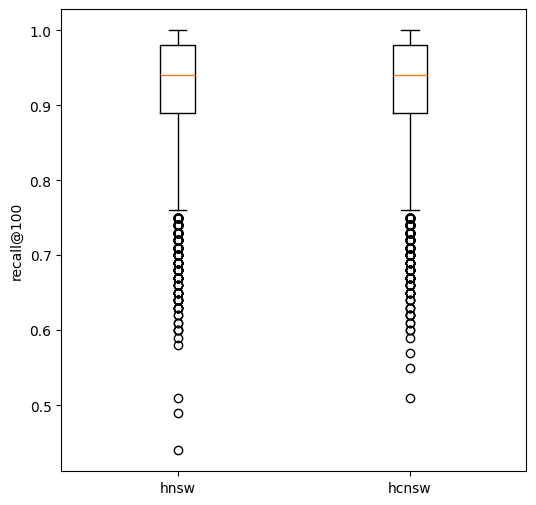

In [7]:
all_recalls = [recalls[method_name] for method_name in METHOD_NAMES]

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=METHOD_NAMES)

plt.show()

## Variação de seeds (1 a 30)

In [4]:
recalls = {}
deltas = {}
for method_name in METHOD_NAMES:
    for seed in range(1, 31):
        recalls[(method_name, seed)] = load(f"data/{method_name}_d0_{DB_NAME}_seed{seed}_recalls.npy")
        deltas[(method_name, seed)] = load(f"data/{method_name}_d0_{DB_NAME}_seed{seed}_deltas.npy")

In [10]:
table = []
for method_name in METHOD_NAMES:
    for seed in range(1, 31):
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        mean_deltas, s_deltas = get_mean_and_sd(deltas[(method_name, seed)])
        table.append((method_name, seed, mean_recalls, s_recalls, mean_deltas, s_deltas, min(recalls[(method_name, seed)])))
table.sort(key=lambda row: row[4], reverse=True)

In [11]:
print(tabulate(table, headers=["method", "seed", "recall@100", "SD", "query time (s)", "SD", "min recall"]))

method      seed    recall@100         SD    query time (s)           SD    min recall
--------  ------  ------------  ---------  ----------------  -----------  ------------
hnsw          26      0.751359  0.287369        0.000156013  3.69608e-05          0
hnsw          23      0.761387  0.186102        0.000155554  3.7454e-05           0.1
hcnsw         29      0.906293  0.0929248       0.000154664  3.76586e-05          0
hcnsw          9      0.907116  0.0898829       0.000154247  4.18491e-05          0
hnsw           6      0.742656  0.199719        0.00015374   3.69097e-05          0
hnsw          16      0.773947  0.170095        0.000152446  3.69818e-05          0.28
hnsw          11      0.712347  0.254917        0.000151023  3.88922e-05          0.04
hnsw           1      0.879955  0.105086        0.000149998  3.56823e-05          0
hnsw          30      0.90421   0.0919238       0.000148362  3.77531e-05          0
hcnsw         25      0.906113  0.0915093       0.000147534  4

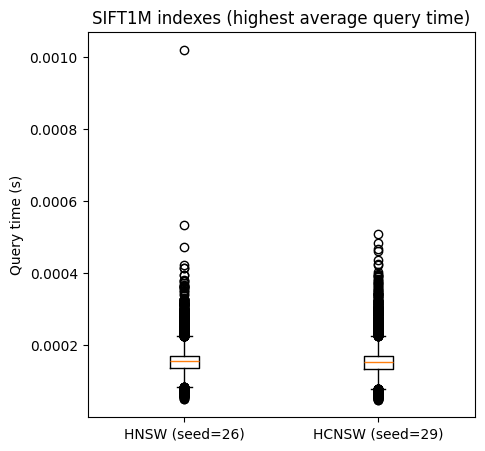

In [20]:
selected_deltas = (deltas[("hnsw", 26)], deltas[("hcnsw", 29)])

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.set_ylabel('Query time (s)')
bplot = ax.boxplot(selected_deltas, labels=("HNSW (seed=26)", "HCNSW (seed=29)"))
plt.title("SIFT1M indexes (highest average query time)")
plt.savefig('boxplot_sift1m2.pdf', bbox_inches='tight') 
plt.show()

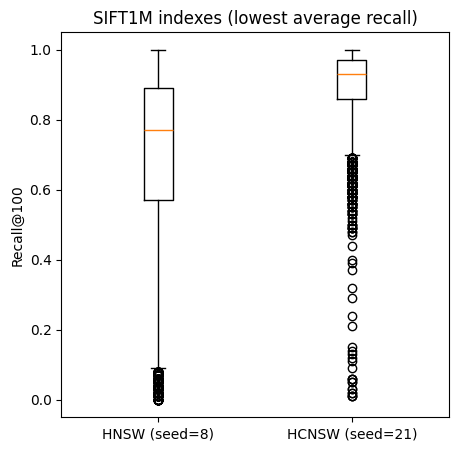

In [18]:
selected_recalls = (recalls[("hnsw", 8)], recalls[("hcnsw", 21)])

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.set_ylabel('Recall@100')
bplot = ax.boxplot(selected_recalls, labels=("HNSW (seed=8)", "HCNSW (seed=21)"))
plt.title("SIFT1M indexes (lowest average recall)")
plt.savefig('boxplot_sift1m.pdf', bbox_inches='tight') 
plt.show()


In [11]:
max_deltas_by_method = {}
for method_name in METHOD_NAMES:
    method_deltas = []
    for seed in range(1, 31):
        method_deltas.append(max(deltas[(method_name, seed)])*1000)
    max_deltas_by_method[method_name] = method_deltas

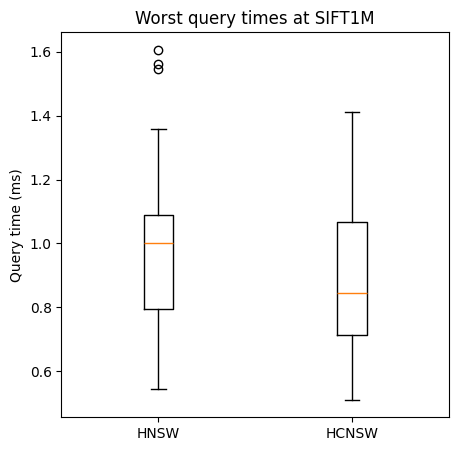

In [17]:
all_deltas = [max_deltas_by_method[method_name] for method_name in METHOD_NAMES]

fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
ax.set_ylabel('Query time (ms)')
bplot = ax.boxplot(all_deltas, labels=[name.upper() for name in METHOD_NAMES])
plt.title("Worst query times at SIFT1M")
plt.savefig('boxplot_sift1m3.pdf', bbox_inches='tight') 
plt.show()

In [5]:
recalls_by_method = {}
for method_name in METHOD_NAMES:
    method_recalls = []
    for seed in range(1, 31):
        method_recalls += list(recalls[(method_name, seed)])
    recalls_by_method[method_name] = method_recalls

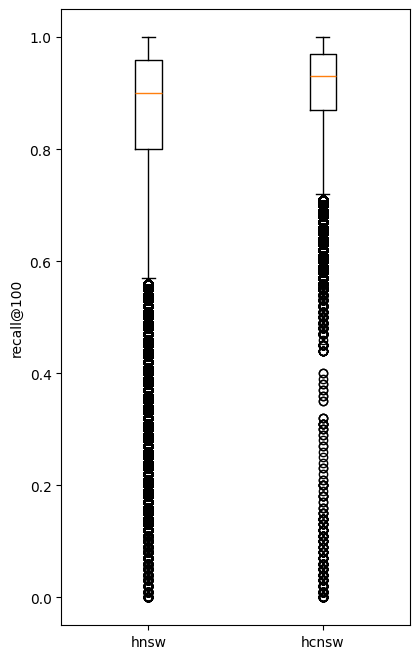

In [19]:
all_recalls = [recalls_by_method[method_name] for method_name in METHOD_NAMES]

fig, ax = plt.subplots()
fig.set_size_inches(4.5, 8)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=METHOD_NAMES)

plt.show()

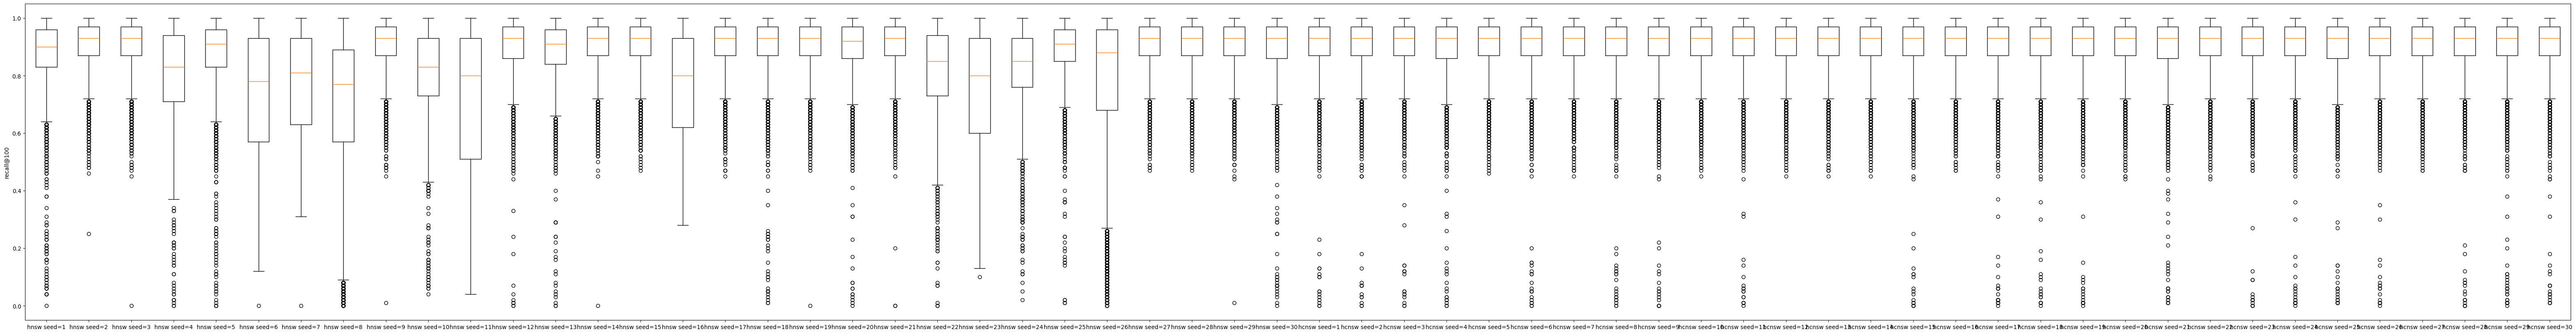

In [5]:
all_recalls = [recalls[(method_name, seed)] for method_name in METHOD_NAMES for seed in range(1, 31)]

fig, ax = plt.subplots()
fig.set_size_inches(80, 10)
ax.set_ylabel('recall@100')
bplot = ax.boxplot(all_recalls, labels=[f"{method_name} seed={seed}" for method_name in METHOD_NAMES for seed in range(1, 31)])

plt.show()

In [39]:
table = []
for method_name in METHOD_NAMES:
    method_recalls = []
    method_deltas = []
    for seed in range(1, 31):
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        method_recalls.append(mean_recalls)
        mean_deltas, s_deltas = get_mean_and_sd(deltas[(method_name, seed)])
        method_deltas.append(mean_deltas)
    mean_recalls, s_recalls = get_mean_and_sd(method_recalls)
    mean_deltas, s_deltas = get_mean_and_sd(method_deltas)
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [40]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100           SD    query time (s)          SD
--------  ------------  -----------  ----------------  ----------
hcnsw         0.925366  0.000191632       0.000367389  0.00221742
hnsw          0.925225  0.000598022      -0.000553365  0.00278923


In [8]:
table = []
for method_name in METHOD_NAMES:
    method_recalls = []
    method_deltas = []
    for seed in range(1, 31):
        method_recalls += list(recalls[(method_name, seed)])
        method_deltas += list(deltas[(method_name, seed)])
    mean_recalls, s_recalls = get_mean_and_sd(method_recalls)
    mean_deltas, s_deltas = get_mean_and_sd(method_deltas)
    table.append((method_name, mean_recalls, s_recalls, mean_deltas, s_deltas))
table.sort(key=lambda row: row[1], reverse=True)

In [9]:
print(tabulate(table, headers=["method", "recall@100", "SD", "query time (s)", "SD"]))

method      recall@100         SD    query time (s)           SD
--------  ------------  ---------  ----------------  -----------
hcnsw         0.907441  0.0885036       0.000145671  3.71647e-05
hnsw          0.85528   0.155           0.000146619  3.66156e-05


In [10]:
table = []
for method_name in METHOD_NAMES:
    for seed in range(1, 31):
        recalls_under_05 = 0
        recalls_under_03 = 0
        mean_recalls, s_recalls = get_mean_and_sd(recalls[(method_name, seed)])
        for recall in recalls[(method_name, seed)]:
            if recall < 0.5:
                recalls_under_05 += 1
                if recall < 0.3:
                    recalls_under_03 += 1
        table.append((method_name, seed, mean_recalls, s_recalls, recalls_under_05, recalls_under_03))
table.sort(key=lambda row: row[2], reverse=True)
table.sort(key=lambda row: row[4])
table.sort(key=lambda row: row[5])

In [11]:
print(tabulate(table, headers=["method", "seed", "recall@100", "SD", "recalls < 0.5", "recalls < 0.3"]))

method      seed    recall@100         SD    recalls < 0.5    recalls < 0.3
--------  ------  ------------  ---------  ---------------  ---------------
hnsw          28      0.925691  0.0684381                0                0
hnsw          16      0.925633  0.0684686                0                0
hnsw          12      0.925596  0.0685545                0                0
hnsw          27      0.925576  0.0685274                0                0
hnsw          10      0.925557  0.0685031                0                0
hcnsw         12      0.925509  0.0686205                0                0
hnsw          24      0.925502  0.0687156                0                0
hcnsw         22      0.925488  0.0686115                0                0
hcnsw         29      0.925482  0.0686929                0                0
hcnsw         27      0.925475  0.0686722                0                0
hcnsw         11      0.925465  0.0687548                0                0
hcnsw       

In [12]:
table = []
for method_name in METHOD_NAMES:
    method_recalls_under_05 = []
    method_recalls_under_03 = []
    for seed in range(1, 31):
        recalls_under_05 = 0
        recalls_under_03 = 0
        for recall in recalls[(method_name, seed)]:
            if recall < 0.5:
                recalls_under_05 += 1
                if recall < 0.3:
                    recalls_under_03 += 1
        method_recalls_under_05.append(recalls_under_05)
        method_recalls_under_03.append(recalls_under_03)
    mean_recalls_05, s_recalls_05 = get_mean_and_sd(method_recalls_under_05)
    mean_recalls_03, s_recalls_03 = get_mean_and_sd(method_recalls_under_03)
    table.append((method_name, mean_recalls_05, s_recalls_05, mean_recalls_03, s_recalls_03))
table.sort(key=lambda row: row[1])
table.sort(key=lambda row: row[3])

In [13]:
print(tabulate(table, headers=["method", "recalls < 0.5", "SD", "recalls < 0.3", "SD"]))

method      recalls < 0.5         SD    recalls < 0.3         SD
--------  ---------------  ---------  ---------------  ---------
hcnsw              17.8      9.07212          10.9667    8.15997
hnsw              354.133  693.436           144.1     405.956


In [10]:
for method_name in METHOD_NAMES:
    for seed in range(1, 31):
        for i, delta in enumerate(deltas[(method_name, seed)]):
            if delta < 0.00001:
                print(f"method={method_name} seed={seed} time={delta} recall={recalls[(method_name, seed)][i]}")